In [15]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')

mpl.rcParams['figure.figsize'] = (12, 4)
mpl.rcParams['axes.grid'] = True
hour=60
day=24*hour


['../..', '../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/load_model', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc']


In [16]:

# data=get_data('model_data/0_summer_data_2022_03_14_1907.csv',npy=False)
# data=pd.concat([data,get_data('model_data/50_summer_data_2022_03_14_1906.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/100_summer_data_2022_03_14_1907.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/rnd_summer_data_2022_03_14_1906.csv',npy=False)],axis=1)
# # data=pd.concat([data,get_data('model_data/mmnt_winter_data_2022_03_14_1923.csv',npy=False)['power_load']],axis=1)

data=get_data('model_data/0_winter_data_2022_03_14_1919.csv',npy=False)
data=pd.concat([data,get_data('model_data/50_winter_data_2022_03_14_1905.csv',npy=False)],axis=1)
data=pd.concat([data,get_data('model_data/100_winter_data_2022_03_14_1904.csv',npy=False)],axis=1)
data=pd.concat([data,get_data('model_data/rnd_winter_data_2022_03_14_1906.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/mmnt_winter_data_2022_03_14_1923.csv',npy=False)['power_load']],axis=1)

# data['power_load'].plot()

<Figure size 576x360 with 0 Axes>

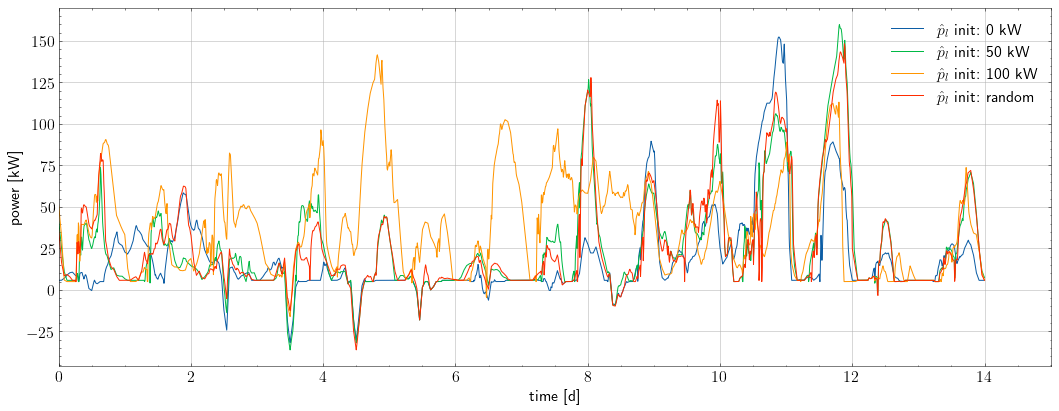

In [18]:
dt=1
di=5
T=14
dfl=di+T
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 16})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = True
with plt.style.context('science'):
    plt.figure(figsize=(15,6))
    df=data[di*day//dt:dfl*day//dt]
#     df=data
    plt.plot(np.arange(len(df))/day*dt,df.power_load.values[:,0],label=r'$\hat{p}_{l}$ init: 0 kW')
    plt.plot(np.arange(len(df))/day*dt,df.power_load.values[:,1],label=r'$\hat{p}_{l}$ init: 50 kW')
    plt.plot(np.arange(len(df))/day*dt,df.power_load.values[:,2],label=r'$\hat{p}_{l}$ init: 100 kW')
    plt.plot(np.arange(len(df))/day*dt,df.power_load.values[:,3],label=r'$\hat{p}_{l}$ init: random')   
#     plt.plot(np.arange(len(df))/day*dt,df.power_load.values[:,4],label=r'$\overline{p}_{l}$ measurement',color='grey')       
#     plt.plot(np.arange(len(df))/day*dt,df.load_fc.values,label=r'$\hat{p}_{d}$ K-day ahead CNN ',linestyle=':')    
#     plt.plot(np.arange(len(df))/day*dt,df.demand_fc_val_k.values,label=r'$\hat{p}_{d}$ demand CNN ',linestyle=':')
    plt.ylabel('power [kW]')
    plt.xlabel('time [d]')
#     plt.xticks(np.arange(0,10,2))
    plt.xlim([0,15])
    plt.legend(markerscale=8,loc='upper right')
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
plt.tight_layout()
plt.savefig('load_winter_inits_14d.pdf')
plt.show()

In [68]:
df2=get_data('0_tri1_loss_2022_03_11_0446.csv',npy=False)
df2=pd.concat([df2,get_data('50_tri1_loss_2022_03_11_0447.csv',npy=False)],axis=1)
df2=pd.concat([df2,get_data('100_tri1_loss_2022_03_11_0446.csv',npy=False)],axis=1)
df2=pd.concat([df2,get_data('rnd_tri1_loss_2022_03_11_0445.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('rnd_winter_loss_2022_03_11_0429.csv',npy=False)['power_load']],axis=1)
# df2.power_load.var(axis=1).plot()

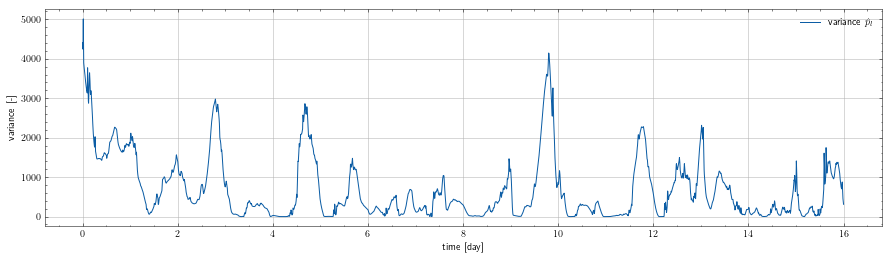

In [123]:
dt=1
di=0
T=16
dfl=di+T
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = True
with plt.style.context('science'):
    plt.figure(figsize=(15,4))
    df=data[di*day//dt:dfl*day//dt]
    df2=df2[di*day//dt:dfl*day//dt]
#     df=data
    plt.plot(np.arange(len(df))/day*dt,df.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
#     plt.plot(np.arange(len(df2))/day*dt,df2.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
    plt.ylabel('variance [-]')
    plt.xlabel('time [day]')
#     plt.legend(markerscale=8,loc='best')
#     plt.xticks(np.arange(0,10,2))
#     plt.ylim([0,75])
    plt.legend(markerscale=8,loc='upper right')
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
# plt.savefig('load_summer-winter_inits_variance.pdf')
plt.show()

# Winter load plot

In [13]:
data=get_data('model_data/model_winter_data_2022_03_15_0131.csv',npy=False).reset_index()

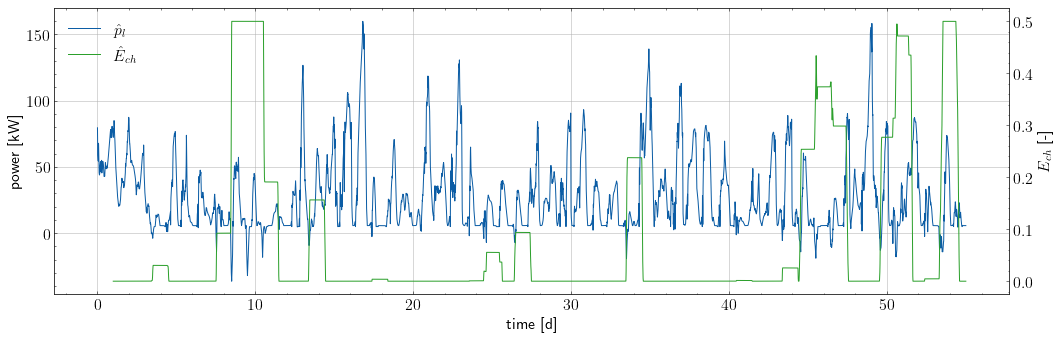

In [14]:
dt=1
di=0
T=55
dfl=di+T
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['axes.grid'] = False
with plt.style.context('science'):
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(figsize=(15,5),)
    df=data[di*day//dt:dfl*day//dt]
#     df2=df2[di*day//dt:dfl*day//dt]
#     df=data
    lns1=ax.plot(np.arange(len(df))/day*dt,df.power_load,label=r'$ \hat{p}_{l}$')
    ax2=ax.twinx()
    lns2=ax2.plot(np.arange(len(df))/day*dt,df.e_char,label=r'$ \hat{E}_{ch}$',color='C2')    
#     plt.plot(np.arange(len(df2))/day*dt,df2.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
    ax.set_ylabel('power [kW]')
    ax2.set_ylabel('$E_{ch}$ [-]')    
    ax.set_xlabel('time [d]')
    ax.grid()
#     plt.legend(markerscale=8,loc='best')
#     plt.xticks(np.arange(0,10,2))
#     plt.ylim([0,75])
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper left')    
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
plt.tight_layout()
plt.savefig('load_winter.pdf')
plt.show()

# Spring load plot

In [10]:
data=get_data('model_data/model_spring_data_2022_03_16_0745.csv',npy=False).reset_index()

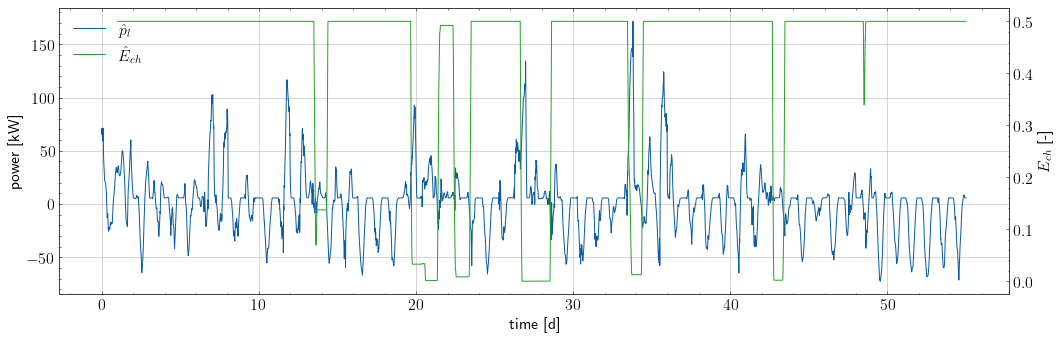

In [12]:
dt=1
di=0
T=55
dfl=di+T
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['axes.grid'] = False
with plt.style.context('science'):
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(figsize=(15,5),)
    df=data[di*day//dt:dfl*day//dt]
#     df2=df2[di*day//dt:dfl*day//dt]
#     df=data
    lns1=ax.plot(np.arange(len(df))/day*dt,df.power_load,label=r'$ \hat{p}_{l}$')
    ax2=ax.twinx()
    lns2=ax2.plot(np.arange(len(df))/day*dt,df.e_char,label=r'$ \hat{E}_{ch}$',color='C2')    
#     plt.plot(np.arange(len(df2))/day*dt,df2.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
    ax.set_ylabel('power [kW]')
    ax2.set_ylabel('$E_{ch}$ [-]')    
    ax.set_xlabel('time [d]')
    ax.grid()
#     plt.legend(markerscale=8,loc='best')
#     plt.xticks(np.arange(0,10,2))
#     plt.ylim([0,75])
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper left')    
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
plt.tight_layout()
plt.savefig('load_spring.pdf')
plt.show()